In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

# Setup

Consider the following 1st-order ordinary differential equation given by

\begin{equation*}
\frac{dx}{dt} = -x
\end{equation*}

since this equation is seperable we can get,

\begin{equation*}
\frac{dx}{x} = -dt
\end{equation*}

integrating both sides we have,

\begin{align*}

\int \frac{dx}{x} &= -\int dt\\
\log{x} &= -t + C
\end{align*}

raising both sides by $e$ gives us,

\begin{equation*}
x = Ae^{-t}
\end{equation*}

where $A = e^C$. Below we have the plot for our solution where $A = 10$,

In [3]:
# setup independent and dependent variables
t = np.linspace(0,10, 100)
x = 10*np.exp(-t)

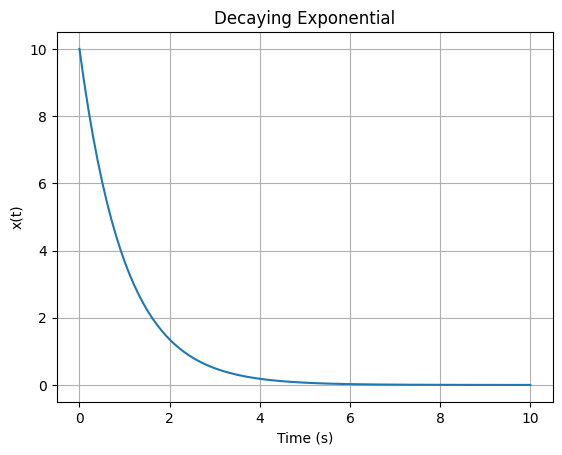

In [4]:
# plot the data
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('x(t)')
plt.title('Decaying Exponential')
plt.grid()
plt.show()

# Using Least-Squares Regression
Now suppose we didn't know the ODE ahead of time and instead was only given discrete information from our system,

\begin{equation*}
\vec{\frac{dx}{dt}} = \left[\frac{dx}{dt}_1, \dots, \frac{dx}{dt}_n\right]
\end{equation*}

first assuming that our differential can be expressed as,

\begin{equation*}
\frac{dx}{dt} = c_1 f_1(x) + c_2 f_2(x) + \dots + c_m f_m(x)
\end{equation*}
or,
\begin{equation*}
\vec{\frac{dx}{dt}} = \bold{F}\vec{c}
\end{equation*}

then one approach we could try is to construct a library of "basis" functions, $\bold{F}$, and use Least-Squares Regression to solve for the coefficients $\vec{c}$.

In [5]:
# discrete time steps
x = 10*np.exp(-t)

# compute ODE at time discretized time steps
x_dot = -1*x




[-1.00000000e+01 -9.03923902e+00 -8.17078421e+00 -7.38576715e+00
 -6.67617146e+00 -6.03475096e+00 -5.45495564e+00 -4.93086479e+00
 -4.45712654e+00 -4.02890322e+00 -3.64182192e+00 -3.29192988e+00
 -2.97565410e+00 -2.68976487e+00 -2.43134276e+00 -2.19774883e+00
 -1.98659770e+00 -1.79573314e+00 -1.62320611e+00 -1.46725480e+00
 -1.32628669e+00 -1.19886224e+00 -1.08368023e+00 -9.79564464e-01
 -8.85451733e-01 -8.00380986e-01 -7.23483504e-01 -6.53974032e-01
 -5.91142759e-01 -5.34348070e-01 -4.83009992e-01 -4.36604277e-01
 -3.94657042e-01 -3.56739933e-01 -3.22465753e-01 -2.91484502e-01
 -2.63479808e-01 -2.38165696e-01 -2.15283666e-01 -1.94600051e-01
 -1.75903638e-01 -1.59003503e-01 -1.43727066e-01 -1.29918331e-01
 -1.17436285e-01 -1.06153465e-01 -9.59546540e-02 -8.67357053e-02
 -7.84024772e-02 -7.08698731e-02 -6.40609723e-02 -5.79062440e-02
 -5.23428381e-02 -4.73139424e-02 -4.27682035e-02 -3.86592014e-02
 -3.49449762e-02 -3.15875992e-02 -2.85527860e-02 -2.58095457e-02
 -2.33298653e-02 -2.10884